In [114]:
import pandas as pd

import functions
import importlib
importlib.reload(functions)
import os
import matplotlib.pyplot as plt
from ipyfilechooser import FileChooser
from IPython.display import display
import ipywidgets as widgets
import matplotlib.pyplot as plt

In [8]:
def load_and_process_worker():
    print("in worker")
    use_config = top_pane_dict['buttons'][1].value
    log_path = top_pane_dict['file_choosers'][0].selected
    config_path = top_pane_dict['file_choosers'][1].selected

    startDict, raceIndex, marksDict, raceEvents, eventLog, selector_dict_day = functions.load_and_process(log_path,config_path,use_config)

    return startDict, raceIndex, marksDict, raceEvents, eventLog, selector_dict_day

In [9]:
# def update_default_chooser_path(chooser):
#     if chooser.selected:
#         chooser.default_path = chooser.selected_path
#         chooser.title = chooser.title
#
# def build_top_pane():
#     from ipyfilechooser import FileChooser
#     import ipywidgets as widgets
#
#     log_file_chooser = FileChooser()
#     log_file_chooser.title = 'Select log file'
#     log_file_chooser.register_callback(update_default_chooser_path)
#
#     config_file_chooser = FileChooser()
#     config_file_chooser.title = 'Select config file'
#     config_file_chooser.register_callback(update_default_chooser_path)
#
#     checkbox_dont_load_config = widgets.Checkbox(value=False,
#                                                  description='Use Sails and Variables from RRP Config')
#
#     button_loadFile = widgets.Button(
#         description='Load Log and Config File'
#     )
#     button_loadFile.on_click(load_and_process_worker())
#
#     selector_box = widgets.HBox([log_file_chooser,config_file_chooser])
#     buttons_box = widgets.HBox([button_loadFile, checkbox_dont_load_config])
#     top_pane = widgets.VBox([selector_box,buttons_box])
#
#     top_pane_dict = {'file_choosers': [log_file_chooser, config_file_chooser],
#                      'buttons': [button_loadFile, checkbox_dont_load_config],
#                      'formatted': [top_pane]}
#
#     return top_pane_dict

In [10]:
top_pane_dict = functions.build_top_pane()


In [11]:
display(top_pane_dict['formatted'][0])

In [12]:
use_config = top_pane_dict['buttons'][1].value
log_path = top_pane_dict['file_choosers'][0].selected
config_path = top_pane_dict['file_choosers'][1].selected

log, var_dict, startDict, raceIndex, marksDict, raceEvents, eventLog, selector_dict_day = functions.load_and_process(log_path,config_path,use_config)

In [115]:
plots = functions.plot_race(startDict, raceEvents, log, marksDict, raceIndex) # create plots for each race

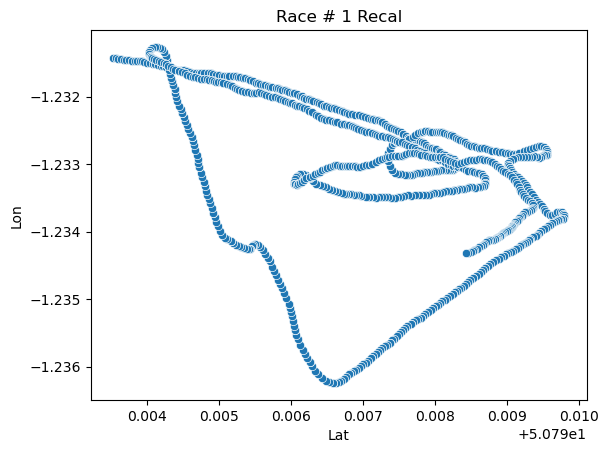

In [121]:
plots[1]

In [136]:
plots_tab_dict = {}
for start in plots.keys():
    plots_tab_dict[start] = widgets.Output()

for start in plots_tab_dict.keys():
    with plots_tab_dict[start]:
        display(plots[start])





In [138]:
startDict

{1: [5372,
  Timestamp('2022-10-01 09:29:58'),
  50.795463,
  -1.2345706,
  50.7991747,
  -1.2346875,
  50.7952306,
  -1.271005,
  'Recal'],
 2: [5963,
  Timestamp('2022-10-01 09:39:59'),
  50.7954034,
  -1.2343027,
  50.7991747,
  -1.2346875,
  50.7952306,
  -1.271005,
  'Recal'],
 3: [6436,
  Timestamp('2022-10-01 09:47:58'),
  50.7954034,
  -1.2343027,
  50.7991747,
  -1.2346875,
  50.7952306,
  -1.271005,
  'Race'],
 4: [14269,
  Timestamp('2022-10-01 12:05:58'),
  50.7959166,
  -1.2334799,
  50.7991747,
  -1.2346875,
  50.7932451,
  -1.2703223,
  'Recal'],
 5: [14919,
  Timestamp('2022-10-01 12:16:58'),
  50.7961806,
  -1.2329939,
  50.7994289,
  -1.2345859,
  50.7915588,
  -1.269267,
  'Recal'],
 6: [15331,
  Timestamp('2022-10-01 12:23:57'),
  50.7961806,
  -1.2329939,
  50.7994289,
  -1.2345859,
  50.7915588,
  -1.269267,
  'Recal'],
 7: [16220,
  Timestamp('2022-10-01 12:38:57'),
  50.7961806,
  -1.2329939,
  50.7994289,
  -1.2345859,
  50.7915588,
  -1.269267,
  'Race'],
 8: 

In [137]:
plot_tab = widgets.Tab(children=list(plots_tab_dict.values()))

for start in plots_tab_dict.keys():
    plot_tab.set_title(int(start-1), "Start #"+str(start))

display(plot_tab)

In [113]:
out_1 = widgets.Output()
out_2 = widgets.Output()

with out_1:
    display(plots[0])

with out_2:
    display((plots[1]))

plot_tab = widgets.Tab(children=[plots_tab_dict[1],out_2])
plot_tab.set_title

display(plot_tab)

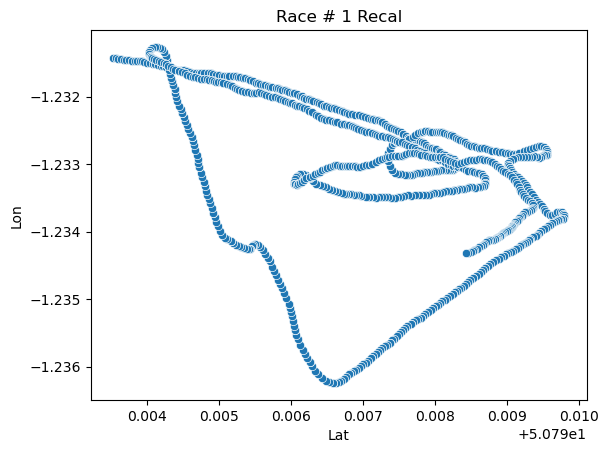

In [14]:
plots[0]

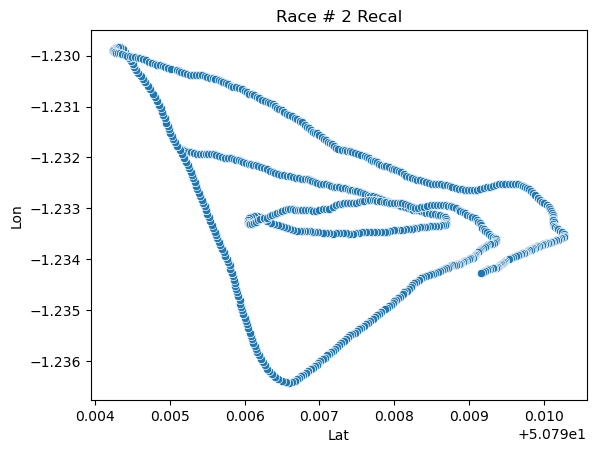

In [15]:
plots[1]

In [16]:
selector_dict_day = functions.build_selectors_day(len(startDict), var_dict)

In [17]:
selector_dict_day['formatted']

In [82]:
event_values = {}
for race in list(selector_dict_day.keys())[0:-2]:
    event_values[race] = {'manual_entry': {},
                          'upwind_sails': {},
                          'downwind_sails': {}}
    for manual_var_type in ['categorical', 'integer', 'float']:
        for manual_var in selector_dict_day[1][manual_var_type].keys():
            event_values[race]['manual_entry'][selector_dict_day[race][manual_var_type][manual_var].description] = selector_dict_day[1][manual_var_type][manual_var].value

    event_values[race]['upwind_sails'] = [selector_dict_day[race]['sails']['mains'].value, selector_dict_day[race]['sails']['jibs'].value, '' ,'' ]
    event_values[race]['downwind_sails'] = [selector_dict_day[race]['sails']['mains'].value,'', selector_dict_day[race]['sails']['stays'].value, selector_dict_day[race]['sails']['spins'].value ]
    event_values[race]['no_sails'] = [selector_dict_day[race]['sails']['mains'].value,'','', '']



In [62]:
str(selector_dict_day[2]['sails']['mains'].value)

'MN-1'

In [83]:
event_values

{1: {'manual_entry': {'Jib_batten_1': 'NotSet',
   'Jib_batten_2': 'NotSet',
   'Main_batten': 'NotSet',
   'Forestay': 0,
   'V1': 0,
   'D1': 0,
   'D2': 0,
   'mastButt': 0,
   '': 0.0},
  'upwind_sails': ['MN-1', 'J1.5-1', '', ''],
  'downwind_sails': ['MN-1', '', 'J1.5-1', 'A1.5-1'],
  'no_sails': ['MN-1', '', '', '']},
 2: {'manual_entry': {'Jib_batten_1': 'NotSet',
   'Jib_batten_2': 'NotSet',
   'Main_batten': 'NotSet',
   'Forestay': 0,
   'V1': 0,
   'D1': 0,
   'D2': 0,
   'mastButt': 0,
   '': 0.0},
  'upwind_sails': ['MN-1', 'J1.5-1', '', ''],
  'downwind_sails': ['MN-1', '', 'J1.5-1', 'A1.5-1'],
  'no_sails': ['MN-1', '', '', '']},
 3: {'manual_entry': {'Jib_batten_1': 'NotSet',
   'Jib_batten_2': 'NotSet',
   'Main_batten': 'NotSet',
   'Forestay': 0,
   'V1': 0,
   'D1': 0,
   'D2': 0,
   'mastButt': 0,
   '': 0.0},
  'upwind_sails': ['MN-1', 'J1.5-1', '', ''],
  'downwind_sails': ['MN-1', '', 'J1.5-1', 'A1.5-1'],
  'no_sails': ['MN-1', '', '', '']},
 4: {'manual_entry'

In [20]:
for race in raceEvents.keys():
    if len(raceEvents[race][0]):
        raceEvents[race][-1][0] != 'Finish'
        raceEvents[race][-1][0] = 'Finish'

In [107]:

events_for_XML = []

for race in raceEvents.keys():
    race_no = race
    mark_no = 1
    if len(raceEvents[race][0]) > 0:
        for event in raceEvents[race]:
            date = str(log['TimeStamp'][event[2]].date())
            time = str(log['TimeStamp'][event[2]].time())
            if event[0] == 'Top':
                sails = event_values[race]['downwind_sails']
                sails = sails[0]+";"+sails[1]+";"+sails[2]+";"+sails[3]
                event_sails = [date, time, 'SailsUp', sails]
                event_mark = [date, time, 'RaceMark', mark_no]
                mark_no += 1

            if event[0] == 'Bottom':
                sails = event_values[race]['upwind_sails']
                sails = sails[0]+";"+sails[1]+";"+sails[2]+";"+sails[3]
                event_sails = [date, time, 'SailsUp', sails]
                event_mark = [date, time, 'RaceMark', mark_no]
                mark_no += 1

            if event[0] == 'Finish':
                sails = event_values[race]['no_sails']
                sails = sails[0]+";"+sails[1]+";"+sails[2]+";"+sails[3]
                event_sails = [date, time, 'SailsUp', sails]
                event_mark = [date, time, 'RaceFinish', race]
                mark_no = 1


            events_for_XML.append(event_mark)
            events_for_XML.append(event_sails)


In [108]:
events_for_XML

[['2022-10-01', '10:04:50', 'RaceMark', 1],
 ['2022-10-01', '10:04:50', 'SailsUp', 'MN-1;;J1.5-1;A1.5-1'],
 ['2022-10-01', '10:13:40', 'RaceMark', 2],
 ['2022-10-01', '10:13:40', 'SailsUp', 'MN-1;J1.5-1;;'],
 ['2022-10-01', '10:29:49', 'RaceMark', 3],
 ['2022-10-01', '10:29:49', 'SailsUp', 'MN-1;;J1.5-1;A1.5-1'],
 ['2022-10-01', '10:38:02', 'RaceMark', 4],
 ['2022-10-01', '10:38:02', 'SailsUp', 'MN-1;J1.5-1;;'],
 ['2022-10-01', '10:43:58', 'RaceFinish', 3],
 ['2022-10-01', '10:43:58', 'SailsUp', 'MN-1;;;'],
 ['2022-10-01', '11:14:59', 'RaceMark', 1],
 ['2022-10-01', '11:14:59', 'SailsUp', 'MN-1;;J1.5-1;A1.5-1'],
 ['2022-10-01', '11:23:18', 'RaceMark', 2],
 ['2022-10-01', '11:23:18', 'SailsUp', 'MN-1;J1.5-1;;'],
 ['2022-10-01', '11:38:21', 'RaceMark', 3],
 ['2022-10-01', '11:38:21', 'SailsUp', 'MN-1;;J1.5-1;A1.5-1'],
 ['2022-10-01', '11:45:56', 'RaceMark', 4],
 ['2022-10-01', '11:45:56', 'SailsUp', 'MN-1;J1.5-1;;'],
 ['2022-10-01', '11:50:51', 'RaceMark', 5],
 ['2022-10-01', '11:50:51',

In [109]:
for start in startDict.keys():
    date = str(log['TimeStamp'][startDict[start][0]].date())
    time = str((log['TimeStamp'][startDict[start][0]]-pd.Timedelta(minutes=6)).time())
    sails = event_values[start]['upwind_sails']
    sails = sails[0]+";"+sails[1]+";"+sails[2]+";"+sails[3]
    event_sails = [date, time, 'SailsUp', sails]
    time = str((log['TimeStamp'][startDict[start][0]]-pd.Timedelta(minutes=8)).time())
    event_manual = ""
    for var in event_values[start]['manual_entry'].keys():
        if var != list(event_values[start]['manual_entry'].keys())[-1]:
            event_manual = event_manual+var+"="+str(event_values[start]['manual_entry'][var])+";"
        else:
            event_manual = event_manual+var+"="+str(event_values[start]['manual_entry'][var])

    event_manual = [date, time, 'ManualEntry', event_manual]

    time = str(log['TimeStamp'][startDict[start][0]].time())
    event_race = [date, time, 'RaceStartGun', start]

    events_for_XML.append(event_sails)
    events_for_XML.append(event_manual)
    events_for_XML.append(event_race)


In [110]:
event_manual

['2022-10-01',
 '13:34:57',
 'ManualEntry',
 'Jib_batten_1=NotSet;Jib_batten_2=NotSet;Main_batten=NotSet;Forestay=0;V1=0;D1=0;D2=0;mastButt=0;=0.0']

In [111]:
events_for_XML.sort(key=lambda x: x[1])
import xml.etree.ElementTree as ET
export_root = ET.Element("daysail")
events = ET.Element("events")
export_root.append(events)

for i in range(len(events_for_XML)):
    event = ET.SubElement(events,"event")
    event.set("date",events_for_XML[i][0])
    event.set("time", events_for_XML[i][1])
    event.set("type", events_for_XML[i][2])
    event.set("attributes", str(events_for_XML[i][3]))
    event.set("commenst","")
    event.set("labelalign","Top")


export_tree = ET.ElementTree(export_root)

with open ('output.xml', "wb") as files :
    export_tree.write(files)

In [112]:
def print_function():
    print("hello world")

In [113]:
button_test = widgets.Button(description='Test',)
button_test.on_click(print_function())
display(button_test)

hello world


Button(description='Test', style=ButtonStyle())

TypeError: 'NoneType' object is not callable

In [71]:
button_test.click()

TypeError: 'NoneType' object is not callable

In [30]:

button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        startDict, raceIndex, marksDict, raceEvents, eventLog, selector_dict_day = load_and_process_worker()

        print("Button clicked.")

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Output()